In [1]:
import pandas as pd
ResearchData=pd.read_csv('hotel_booking_data_cleaned.csv') #load data as pandas dataframe
ResearchData.head() #it is seen that the forth row has NaN (missing record).

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01/07/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01/07/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02/07/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02/07/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03/07/2015


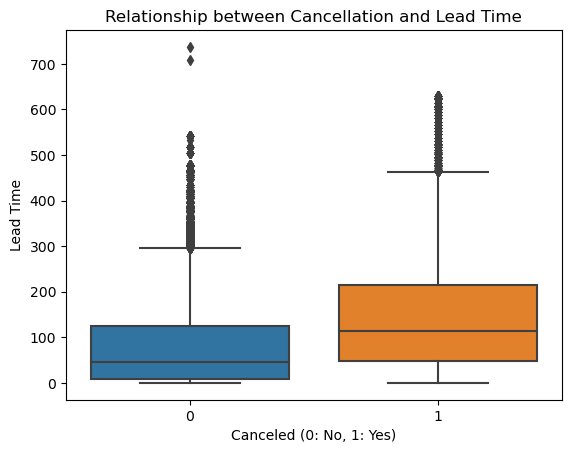

In [5]:
import seaborn as sns  
import matplotlib.pyplot as plt  
  
# 创建箱形图  
sns.boxplot(x='is_canceled', y='lead_time', data=ResearchData)  
plt.xlabel('Canceled (0: No, 1: Yes)')  
plt.ylabel('Lead Time')  
plt.title('Relationship between Cancellation and Lead Time')  
plt.show()  

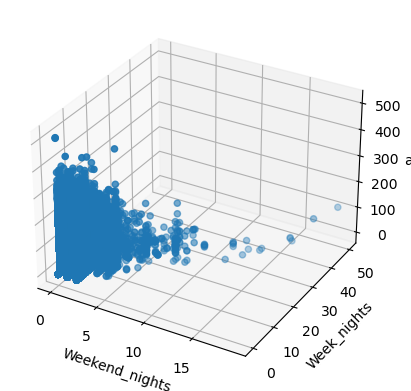

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd   
from mpl_toolkits.mplot3d import Axes3D  

fig = plt.figure()  
ax = fig.add_subplot(111, projection='3d')  
Sub_ResearchData = ResearchData[['stays_in_weekend_nights',  'stays_in_week_nights', 'adr']]
df = pd.DataFrame(Sub_ResearchData)
df1 = df[df['adr'] <= 1000]  
ax.scatter(df1['stays_in_weekend_nights'], df1['stays_in_week_nights'], df1['adr'])  
  
ax.set_xlabel('Weekend_nights')  
ax.set_ylabel('Week_nights')  
ax.set_zlabel('adr')  
  
plt.show()  

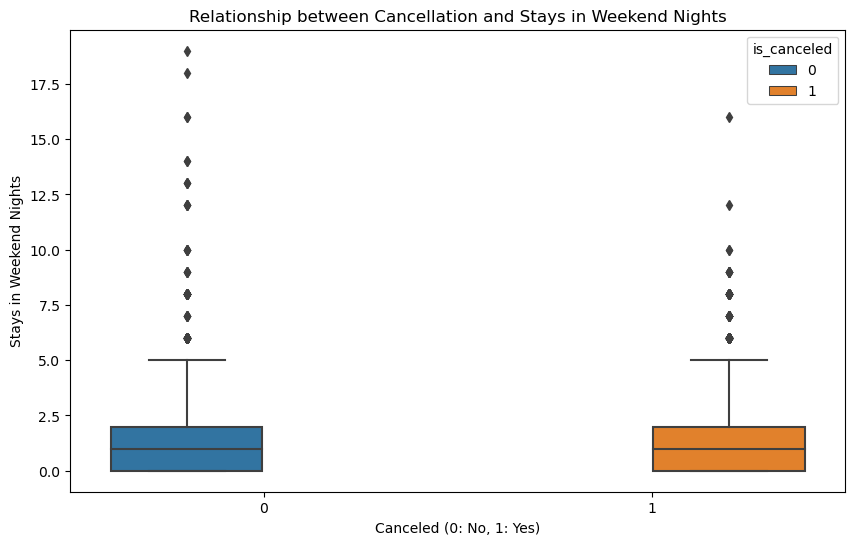

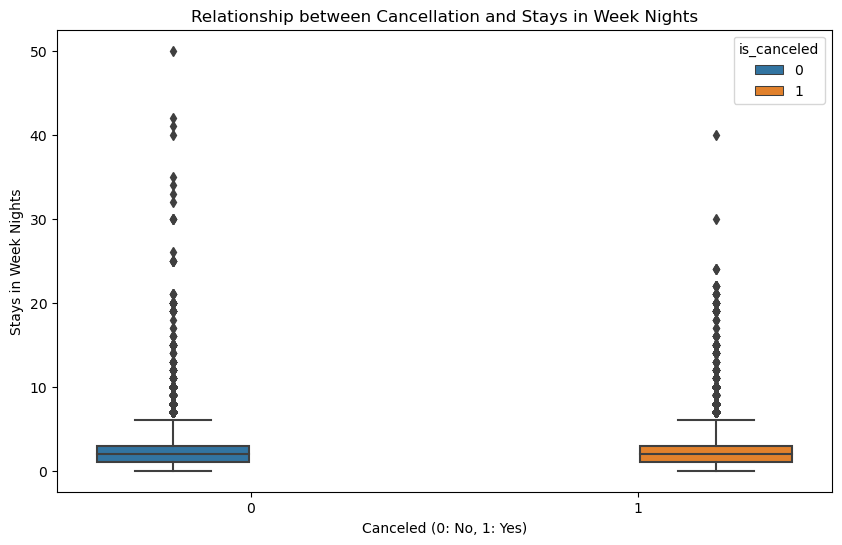

In [4]:
import seaborn as sns  
import matplotlib.pyplot as plt  
  
# 创建分类箱形图  
plt.figure(figsize=(10, 6))  
sns.boxplot(x='is_canceled', y='stays_in_weekend_nights', data=ResearchData, hue='is_canceled')  
plt.xlabel('Canceled (0: No, 1: Yes)')  
plt.ylabel('Stays in Weekend Nights')  
plt.title('Relationship between Cancellation and Stays in Weekend Nights')  
plt.show()  
  
plt.figure(figsize=(10, 6))  
sns.boxplot(x='is_canceled', y='stays_in_week_nights', data=ResearchData, hue='is_canceled')  
plt.xlabel('Canceled (0: No, 1: Yes)')  
plt.ylabel('Stays in Week Nights')  
plt.title('Relationship between Cancellation and Stays in Week Nights')  
plt.show()  

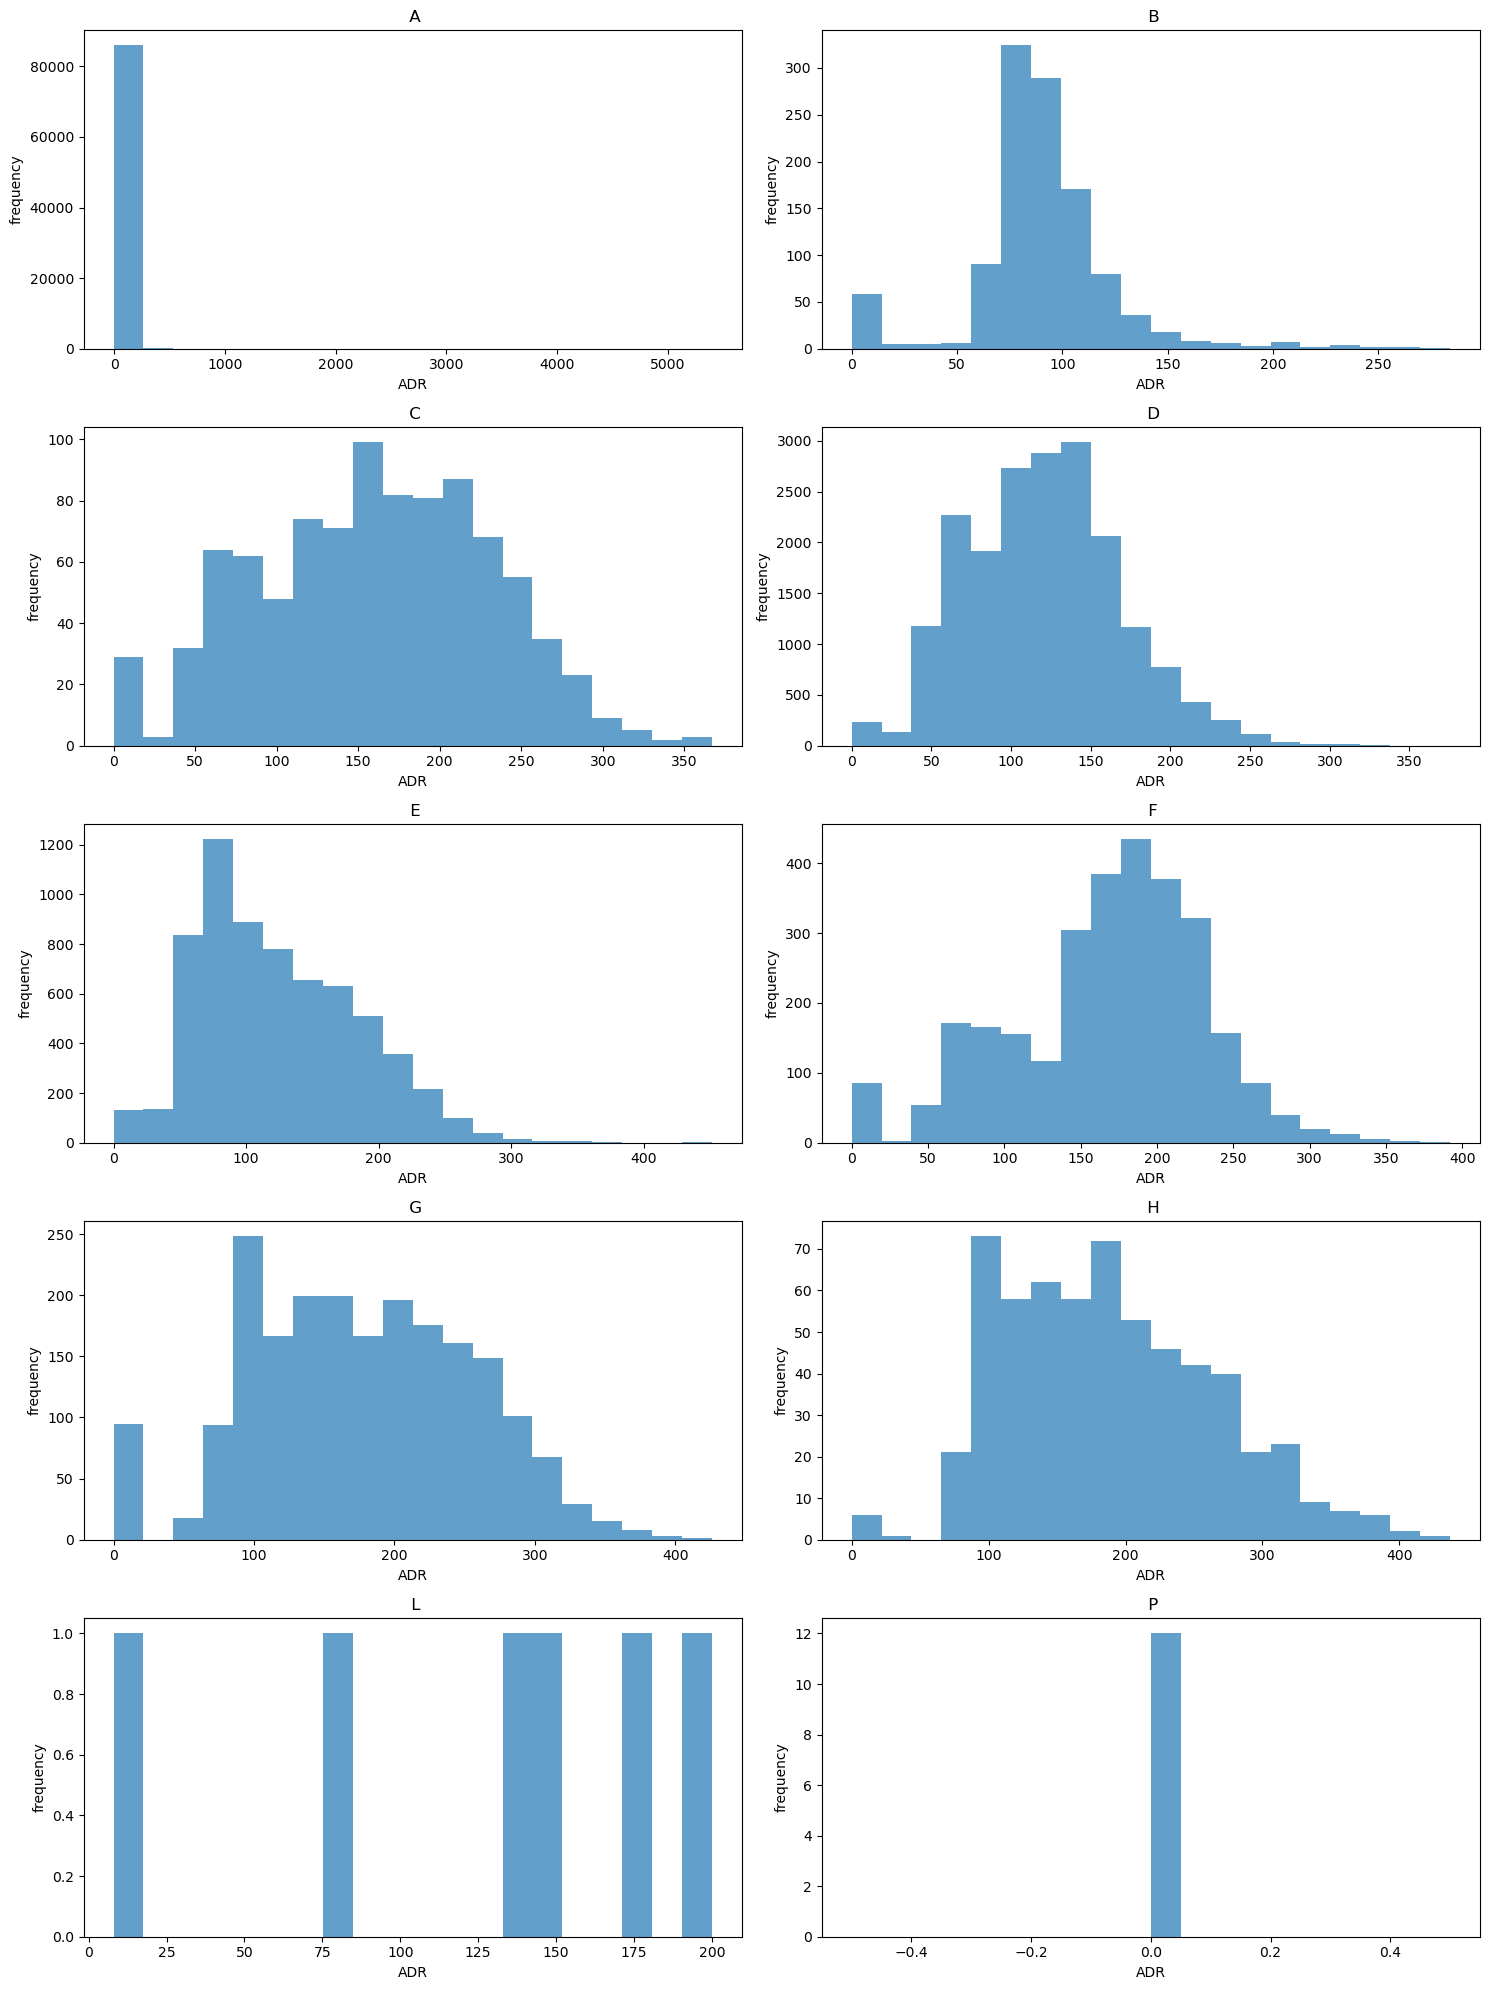

In [6]:
import matplotlib.pyplot as plt  
fig, axs = plt.subplots(5, 2, figsize=(15, 20)) 
room_types = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'L', 'P'] 
df = pd.DataFrame(ResearchData)
 
for i, room_type in enumerate(room_types):  
    row = i // 2  
    col = i % 2  
    axs[row, col].hist(df[df['reserved_room_type'] == room_type]['adr'], bins=20, alpha=0.7)  
    axs[row, col].set_title(f' {room_type}')
    axs[row, col].set_xlabel('ADR')  
    axs[row, col].set_ylabel('frequency')  

plt.tight_layout()  
plt.show()  

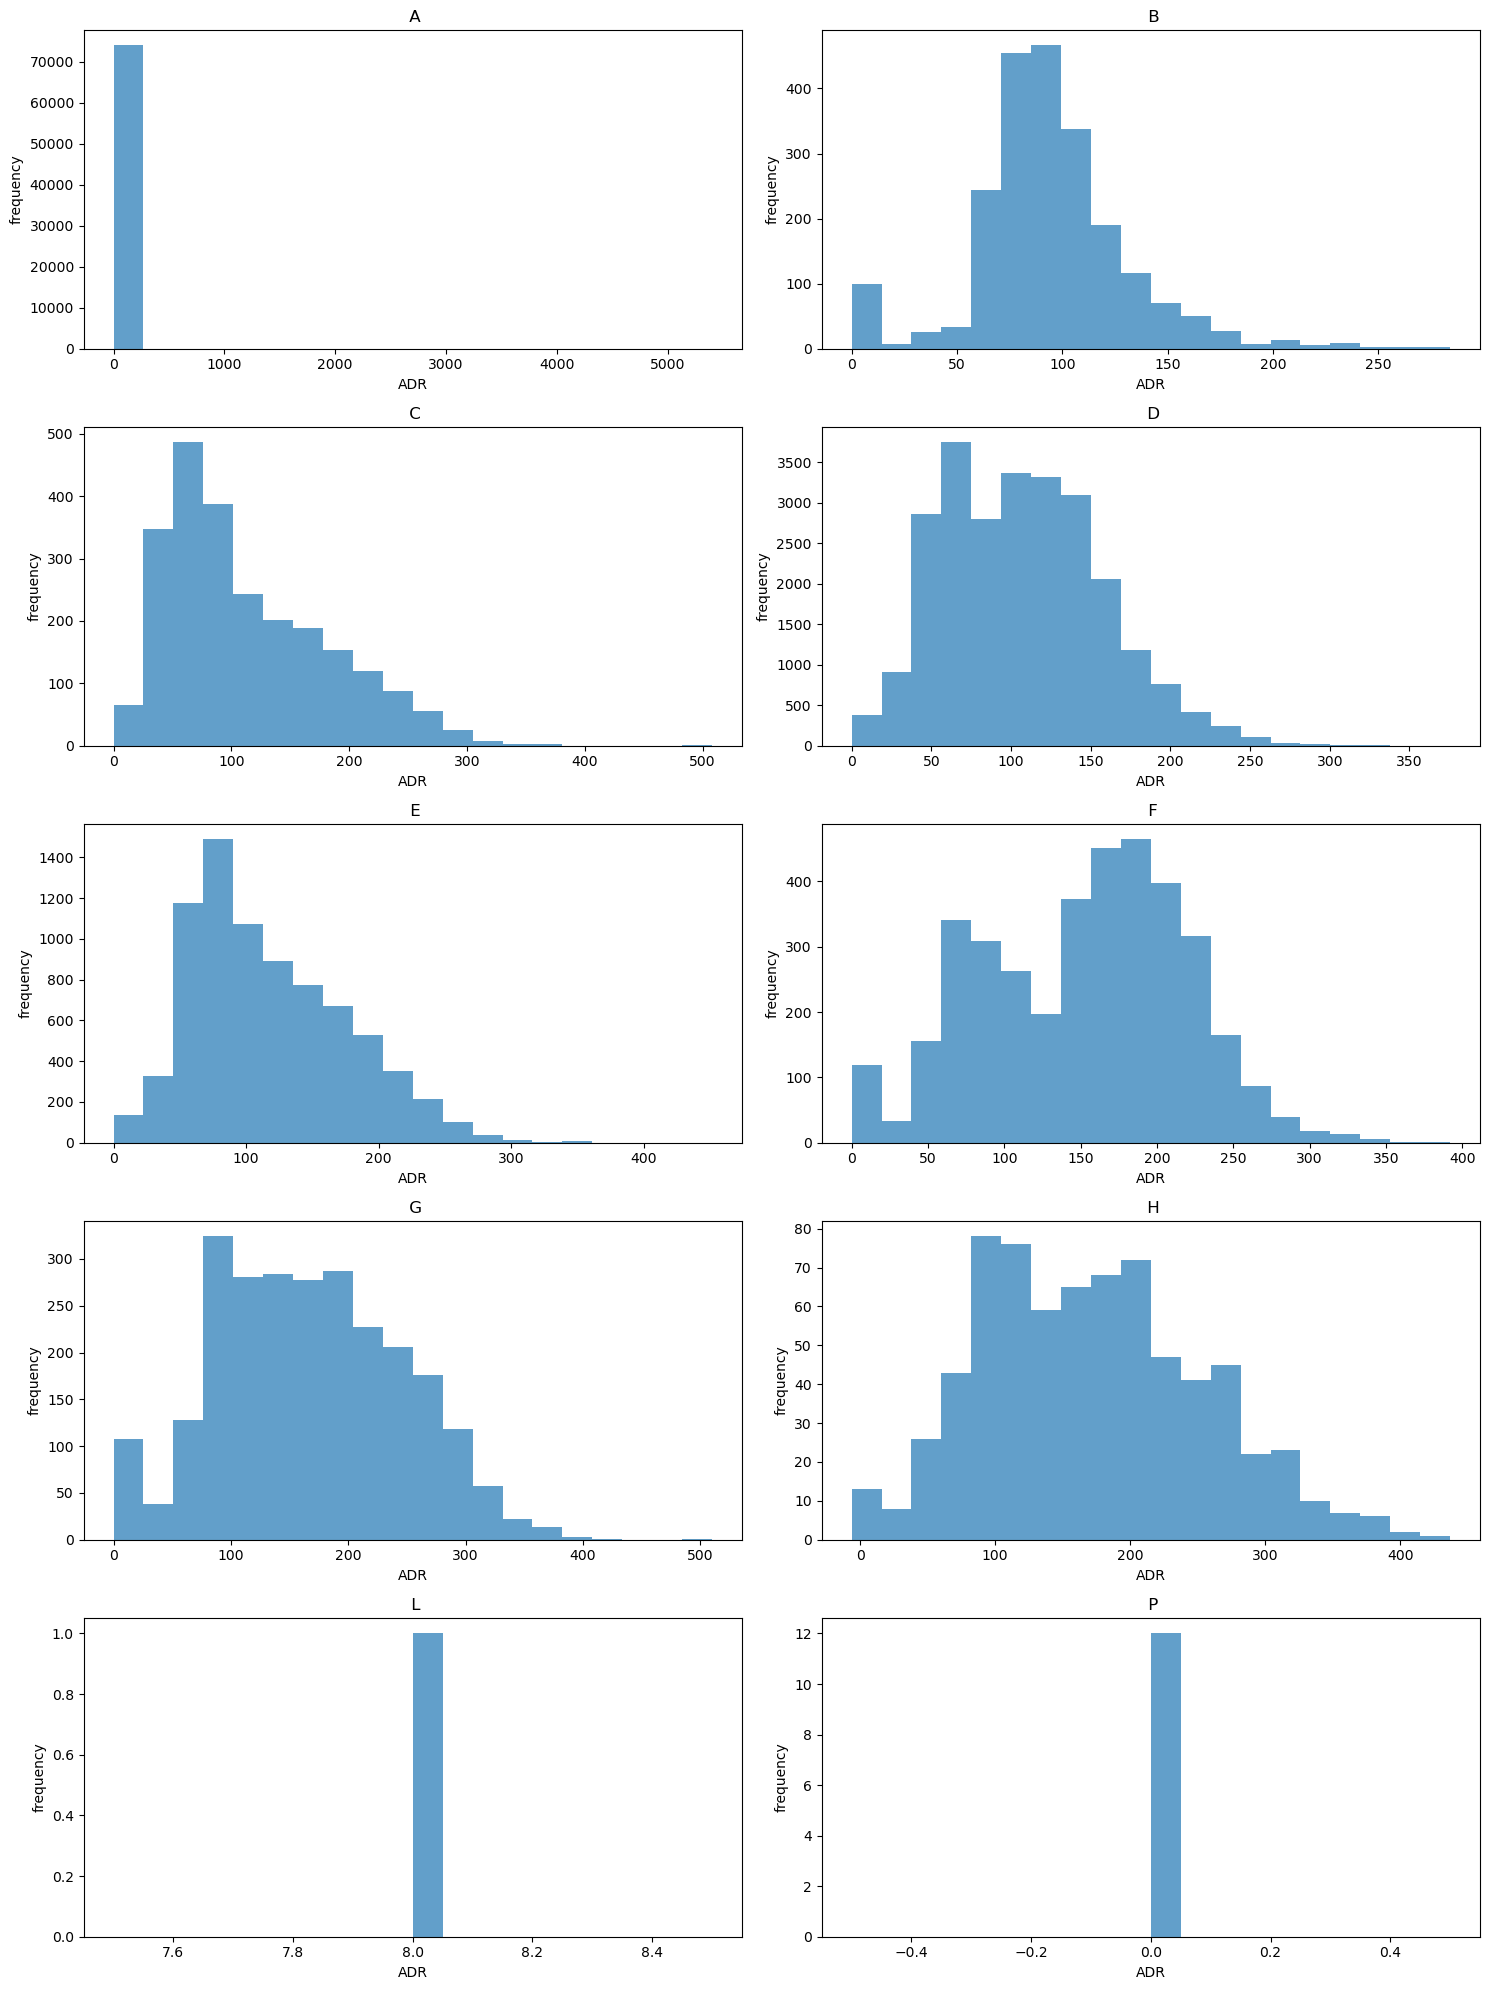

In [7]:
import matplotlib.pyplot as plt  
fig, axs = plt.subplots(5, 2, figsize=(15, 20)) 
room_types = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'L', 'P'] 
df = pd.DataFrame(ResearchData)
 
for i, room_type in enumerate(room_types):  
    row = i // 2  
    col = i % 2  
    axs[row, col].hist(df[df['assigned_room_type'] == room_type]['adr'], bins=20, alpha=0.7)  
    axs[row, col].set_title(f' {room_type}')
    axs[row, col].set_xlabel('ADR')  
    axs[row, col].set_ylabel('frequency')  

plt.tight_layout()  
plt.show()  

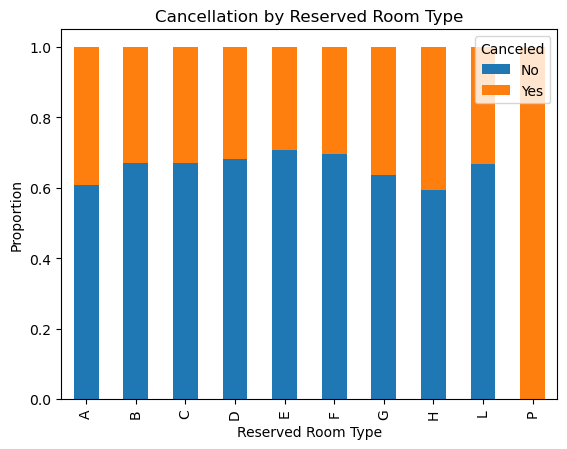

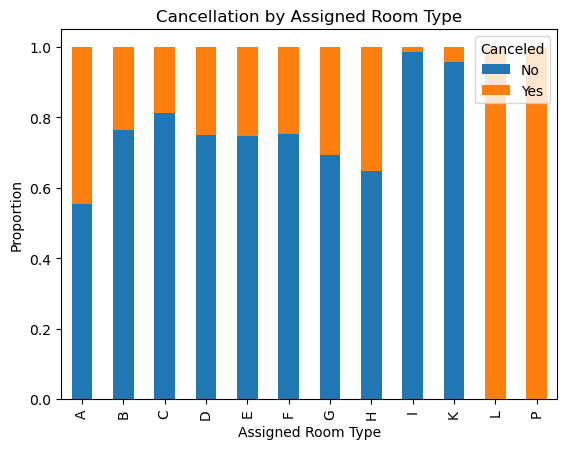

In [8]:
import pandas as pd  
import matplotlib.pyplot as plt  
  
# 创建交叉表  
cross_table = pd.crosstab(index=ResearchData['reserved_room_type'], columns=ResearchData['is_canceled'], normalize='index')  
cross_table.plot(kind='bar', stacked=True)  
plt.xlabel('Reserved Room Type')  
plt.ylabel('Proportion')  
plt.title('Cancellation by Reserved Room Type')  
plt.legend(title='Canceled', loc='upper right', labels=['No', 'Yes'])  
plt.show()  
  
cross_table = pd.crosstab(index=ResearchData['assigned_room_type'], columns=ResearchData['is_canceled'], normalize='index')  
cross_table.plot(kind='bar', stacked=True)  
plt.xlabel('Assigned Room Type')  
plt.ylabel('Proportion')  
plt.title('Cancellation by Assigned Room Type')  
plt.legend(title='Canceled', loc='upper right', labels=['No', 'Yes'])  
plt.show()  

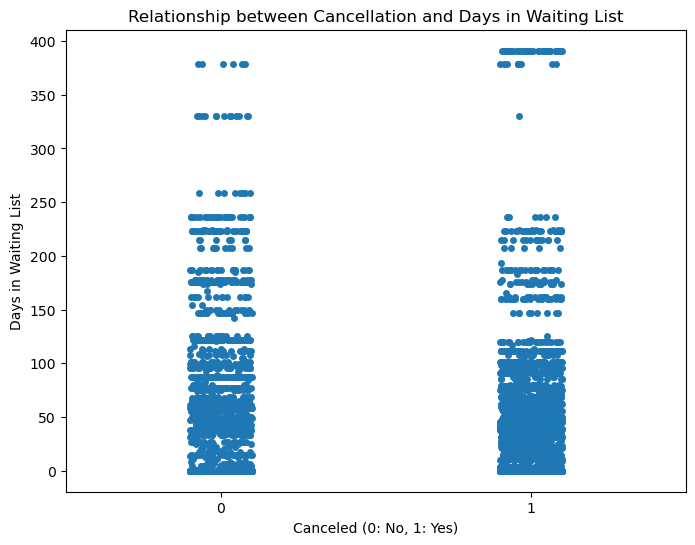

In [10]:
import seaborn as sns  
import matplotlib.pyplot as plt  
  
# 创建散点图  
plt.figure(figsize=(8, 6))  
sns.stripplot(x='is_canceled', y='days_in_waiting_list', data=ResearchData, jitter=True)  
plt.xlabel('Canceled (0: No, 1: Yes)')  
plt.ylabel('Days in Waiting List')  
plt.title('Relationship between Cancellation and Days in Waiting List')  
plt.show()  

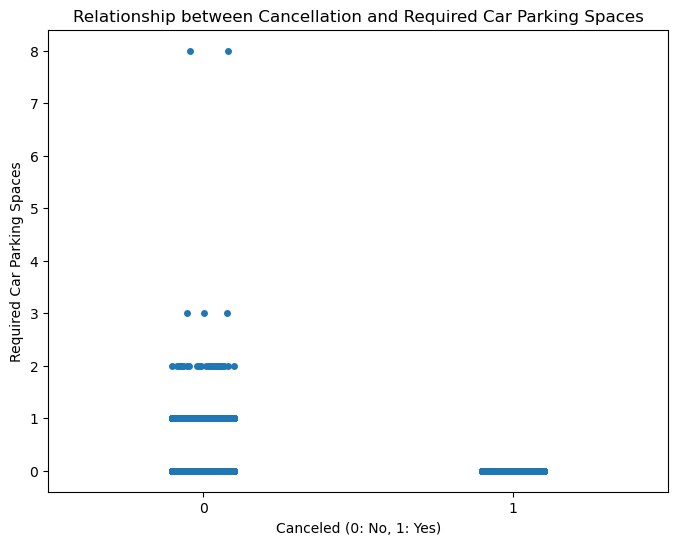

In [12]:
import seaborn as sns  
import matplotlib.pyplot as plt  
  
# 创建散点图  
plt.figure(figsize=(8, 6))  
sns.stripplot(x='is_canceled', y='required_car_parking_spaces', data=ResearchData, jitter=True)  
plt.xlabel('Canceled (0: No, 1: Yes)')  
plt.ylabel('Required Car Parking Spaces')  
plt.title('Relationship between Cancellation and Required Car Parking Spaces')  
plt.show()  

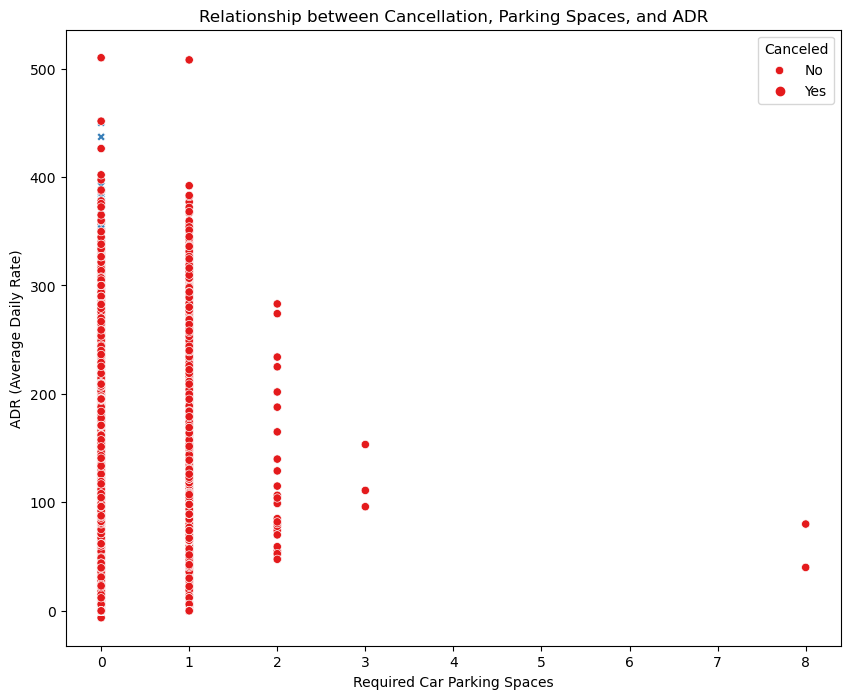

In [17]:
import seaborn as sns  
import matplotlib.pyplot as plt  
  
# 创建散点图  
plt.figure(figsize=(10, 8))  
sns.scatterplot(x='required_car_parking_spaces', y=df1['adr'], hue='is_canceled', style='is_canceled', data=ResearchData, palette='Set1')  
plt.xlabel('Required Car Parking Spaces')  
plt.ylabel('ADR (Average Daily Rate)')  
plt.title('Relationship between Cancellation, Parking Spaces, and ADR')  
plt.legend(title='Canceled', loc='upper right', labels=['No', 'Yes'])  
plt.show()  

E:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


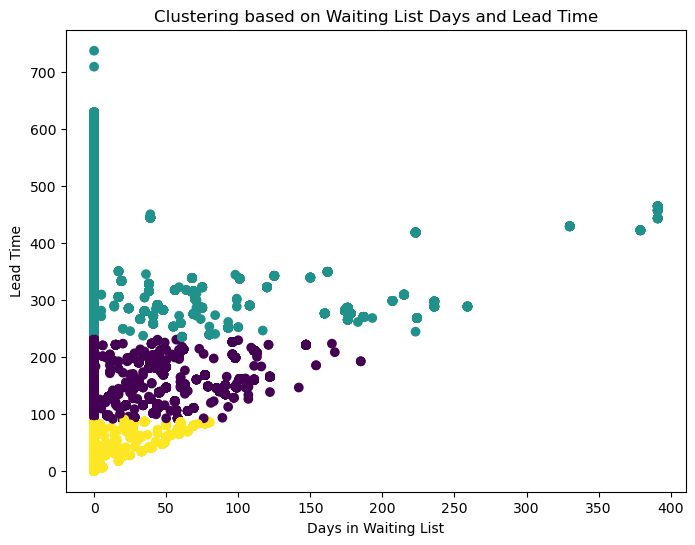

In [2]:
from sklearn.cluster import KMeans  
import matplotlib.pyplot as plt  
  
# 选择要用于聚类的特征  
X = ResearchData[['days_in_waiting_list', 'lead_time']]  
  
# 创建K均值聚类模型  
kmeans = KMeans(n_clusters=3, random_state=42)  # 假设要分为3类  
  
# 进行聚类  
clusters = kmeans.fit_predict(X)  
  
# 将聚类结果可视化  
plt.figure(figsize=(8, 6))  
plt.scatter(X['days_in_waiting_list'], X['lead_time'], c=clusters, cmap='viridis')  
plt.xlabel('Days in Waiting List')  
plt.ylabel('Lead Time')  
plt.title('Clustering based on Waiting List Days and Lead Time')  
plt.show()  

In [ ]:
from sklearn.cluster import SpectralClustering  
import matplotlib.pyplot as plt  
  
# 选择要用于聚类的特征  
X = ResearchData[['days_in_waiting_list', 'lead_time']]  
  
# 创建SpectralClustering模型  
spectral_model = SpectralClustering(n_clusters=3, random_state=42, affinity='nearest_neighbors')  # 假设要分为3类  
  
# 进行聚类  
clusters = spectral_model.fit_predict(X)  
  
# 将聚类结果可视化  
plt.figure(figsize=(8, 6))  
plt.scatter(X['days_in_waiting_list'], X['lead_time'], c=clusters, cmap='viridis')  
plt.xlabel('Days in Waiting List')  
plt.ylabel('Lead Time')  
plt.title('Clustering based on Waiting List Days and Lead Time using Spectral Clustering')  
plt.show()  

E:\anaconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


In [ ]:
sub_ResearchData = ResearchData[['lead_time','stays_in_weekend_nights','stays_in_week_nights','reserved_room_type','assigned_room_type','days_in_waiting_list','adr','required_car_parking_spaces',
'reservation_status','reservation_status_date', 'is_canceled']]
Y = sub_ResearchData['is_canceled'] #this is our prediction target

X = sub_ResearchData.drop(['is_canceled'],axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=1) 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=2) # number estimators is the key parameter
clf = clf.fit(X_train, Y_train)
Y_predTrain = clf.predict(X_train)
Y_predTest = clf.predict(X_test)

print('Training accuracy is %f' % accuracy_score(Y_train, Y_predTrain))
      
print('Validation accuracy is %f' %accuracy_score(Y_test, Y_predTest))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score  
import numpy as np
clf = DecisionTreeClassifier(max_depth=2) # number estimators is the key parameter
clf = clf.fit(X_train, Y_train)
Y_predTrain = clf.predict(X_train)
Y_predTest = clf.predict(X_test)

disp = ConfusionMatrixDisplay.from_estimator(clf, X_test, Y_test,display_labels=['1','0'],values_format = '.0f',cmap=plt.cm.Blues)
np.set_printoptions(precision=1)


cm = disp.confusion_matrix  
 
precision = precision_score(Y_test, Y_predTest, pos_label= 1 )   

recall = recall_score(Y_test, Y_predTest, pos_label= 1 ) 

f1 = f1_score(Y_test, Y_predTest, pos_label= 1 )  
  
print("Precision:", precision)  
print("Recall:", recall)  
print("F1 Score:", f1) 
print('Training accuracy is %f' % accuracy_score(Y_train, Y_predTrain))
print('Validation accuracy is %f' %accuracy_score(Y_test, Y_predTest))
print(disp.confusion_matrix)